In [236]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

N=1001
dt=1.
t=np.arange(0,N*dt,dt)

x = np.cumsum(np.random.randn(N)) # red noise
f0=0.03 # Hz
x = x+ 40.*np.sin(f0*2*np.pi*t) # + sine wave
x=x-np.mean(x)
noise = 60.*np.random.randn(N)
xn = x+noise
xn[N/2:]=xn[N/2:]-2000.
# remove the mean!!
xn = xn-np.mean(xn)

<div style='background:#F0F0F0'>**1** Implement a low-pass filter of the data in the frequency domain, with a cutoff frequency of $f_c=0.06\ Hz$.</div>
   
  1. plot the signal and the smoothed signal (suggest zooming in on the step).
  2. plot the spectral response $|H(f)|$
  3. plot the phase response $\mathrm{angle}(H(f))$.

<div style='background:#F0F0F0'>
Be sure to comment on how good your filter is.
</div>

In [237]:
X = np.fft.fft(xn)
ff = np.linspace(0,1,N)
fc = 0.06

X[(ff>fc) & (ff<(1./dt-fc))]=1.e-15
y = np.real(np.fft.ifft(X))

Gxx,f = mlab.psd(xn, Fs=1, NFFT=256)
Gyy,f = mlab.psd(y, Fs=1, NFFT=256)
H = np.sqrt(Gyy/Gxx)

Gxy,f  = mlab.csd(xn,y,Fs=1./dt,NFFT=256)

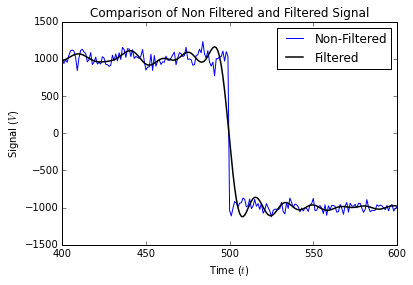

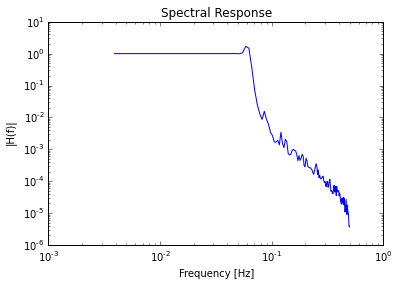

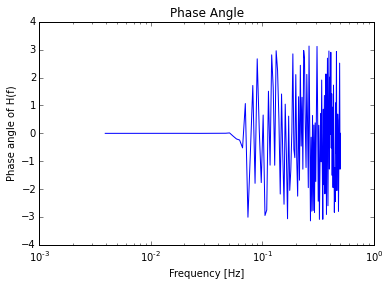

In [238]:
plt.plot(t, xn, label = 'Non-Filtered')
plt.plot(t, y,'k', label = 'Filtered', linewidth = 1.5)
plt.xlim([400,600])
plt.ylabel(r'Signal ($V$)');plt.xlabel(r'Time ($t$)');plt.title('Comparison of Non Filtered and Filtered Signal')
plt.legend(loc=0)
plt.show()

fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.loglog(f, H)
ax.set_xlabel('Frequency [Hz]');ax.set_ylabel('|H(f)|');ax.set_title('Spectral Response')
plt.show()

fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.semilogx(f,np.angle(Gxy))
ax.set_xlabel('Frequency [Hz]');ax.set_ylabel('Phase angle of H(f)');ax.set_title('Phase Angle')
plt.show()

# put words here

<div style='background:#F0F0F0'>**2** Now repeat the above but apply a Hanning window to the frequency window *before* you apply it to the FFT of $x_n$.  Comment on how well the filter is doing when you do this.  (Its helpful to keep the previous result up)  (It is OK to use the `hanning` function)
</div>

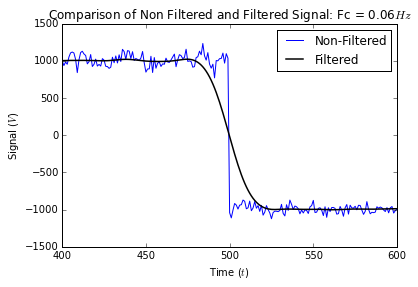

In [239]:
Xn = np.fft.fft(xn)  
K = 101
fn = ff*0. + 1.e-5
fn[(ff<fc) | (ff>1-fc)] = 1.

han = np.hanning(K)
fn[:K/2] = fn[:K/2] * han[K/2+1:]
fn[N-K/2:] = fn[N-K/2:] * han[:K/2]

han =  np.hanning(120)
fn[:60] = fn[:60]*han[60:]
fn[N-61:] = fn[N-61:]*han[:61]

XX = Xn*fn
y2 = np.real(np.fft.ifft(XX))
plt.plot(xn, label = 'Non-Filtered')
plt.plot(y2,'k', label = 'Filtered', linewidth = 1.5)
plt.xlim([400,600])
plt.ylabel(r'Signal ($V$)')
plt.xlabel(r'Time ($t$)')
plt.title(r'Comparison of Non Filtered and Filtered Signal: Fc = 0.06$Hz$')
plt.legend(loc=0)

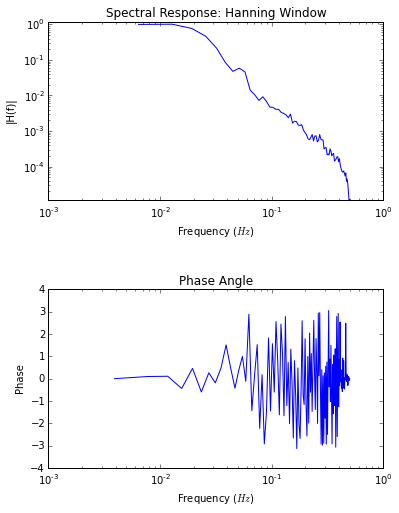

In [240]:
Gyy,f = mlab.psd(y2,Fs = 1, NFFT = 156)
Gxx,f = mlab.psd(xn,Fs = 1, NFFT = 156)
H2 = np.sqrt(Gyy/Gxx)
fig, ax = plt.subplots(2,1, figsize=(6,8))
ax[0].loglog(f,H2)
ax[0].set_ylim([-0.2, 1.2])
ax[0].set_xlabel(r'Frequency ($Hz$)')
ax[0].set_ylabel(r'|H(f)|')
ax[0].set_title('Spectral Response: Hanning Window')

Gxy,f = mlab.csd(xn,y2, Fs = 1., NFFT = 256)
ax[1].semilogx(f,np.angle(Gxy))
ax[1].set_title('Phase Angle')
ax[1].set_xlabel(r'Frequency ($Hz$)')
ax[1].set_ylabel('Phase')
plt.subplots_adjust(hspace = 0.5)

# words

<div style='background:#F0F0F0'>**3** So the Hanning window falls off a *lot* earlier and more slowly than a step function, so adjust the cutoff frequency to get a reasonable filter that preserves the amplitude of the sine wave at $f=0.03\ \mathrm{Hz}$.  Comment on the pros and cons of this approach.  
</div>

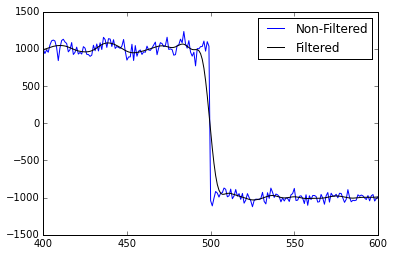

In [241]:
Xn = np.fft.fft(xn)  
fbx = ff*0. + 1.e-15
fc2 = fc*2
fbx[(ff<fc2) | (ff>1-fc2)] = 1.

han2 =  np.hanning(120*2)
fbx[:120] = fbx[:120]*han2[120:]
fbx[N-121:] = fbx[N-121:]*han2[:121]
Xbx = Xn*fbx
Ybx = np.real(np.fft.ifft(Xbx))
plt.plot(xn,label='Non-Filtered')
plt.plot(Ybx,'k',label='Filtered')
plt.xlim([400,600])
plt.legend()

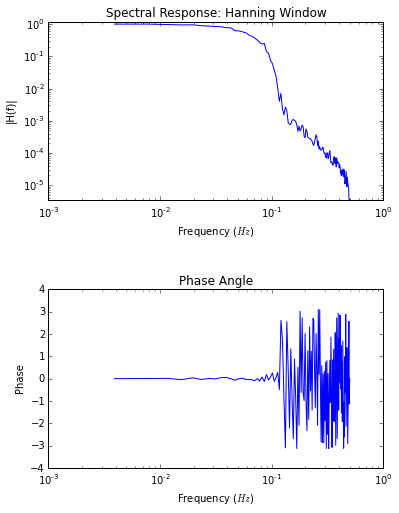

In [242]:
Gxbx,f = mlab.psd(xn,Fs=1,NFFT=256)
Gybx,f = mlab.psd(Ybx,Fs=1,NFFT=256)
Hbx = np.sqrt(Gybx/Gxbx)

fig, ax = plt.subplots(2,1, figsize=(6,8))
ax[0].loglog(f,Hbx)
ax[0].set_ylim([-0.2, 1.2])
ax[0].set_xlabel(r'Frequency ($Hz$)')
ax[0].set_ylabel(r'|H(f)|')
ax[0].set_title('Spectral Response: Hanning Window')

Gxy,f = mlab.csd(xn,Ybx, Fs = 1., NFFT = 256)
ax[1].semilogx(f,np.angle(Gxy))
ax[1].set_title('Phase Angle')
ax[1].set_xlabel(r'Frequency ($Hz$)')
ax[1].set_ylabel('Phase')
plt.subplots_adjust(hspace = 0.5)

# put words

## Q2: Implementing a bandpass filter

<div style='background:#F0F0F0'>**1** Create a red-noise process with 20000 data points, $dt=1\ s$.  Using a **truncated Dirichlet Kernel**, create a **bandpass** filter centered at $f_c=0.1\ Hz$ that has a passband that is approximately 0.1 Hz wide. Choose a filter length that is long enough to accomodate 0.1 Hz. 
</div>

   1. Plot the unshifted and shifted filters versus $k$, the time index.
   2. Plot the spectra, the response function $H^2(f)$ and the phase response
   3. Comment on your bandpass and if it indeed passed the right frequencies.

HINT: when you make the Dirichlet Kernel filter make sure that the $k=0$ case is treated "correctly" because $sin(0)=0$ and you will get a discontinuity.  Calculate what $h_0$ should be from [L'Hôpital's_rule](http://en.wikipedia.org/wiki/L'Hôpital's_rule).

(-100, 100)

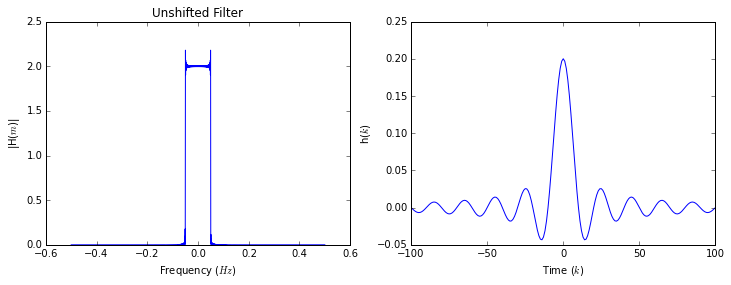

In [267]:
N=20000
x = np.cumsum(np.random.randn(N))
x = x-np.mean(x)

fc = 0.1
M = 2*N*fc+1
m = np.linspace(-0.5, 0.5, N-1)
h = (1./N)*np.sin(np.pi*(k+0.000001)*M/N/2)/np.sin(np.pi*(k+0.000001)/N/2)
k = np.array(range(-N/2+1,N/2))

K = 2000
h1 = h
h1[abs(k)>(K-1)/2]=0
H1 = np.fft.fftshift(np.fft.fft(h1))
hk = np.fft.ifft(H1)

fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(m,abs(H1))
ax[0].set_xlabel(r'Frequency ($Hz$)')
ax[0].set_ylabel(r'|H($m$)|')
ax[0].set_title('Unshifted Filter')
ax[1].plot(k,h)
ax[1].set_ylabel(r'h($k$)')
ax[1].set_xlabel(r'Time ($k$)')
ax[1].set_xlim([-100,100])

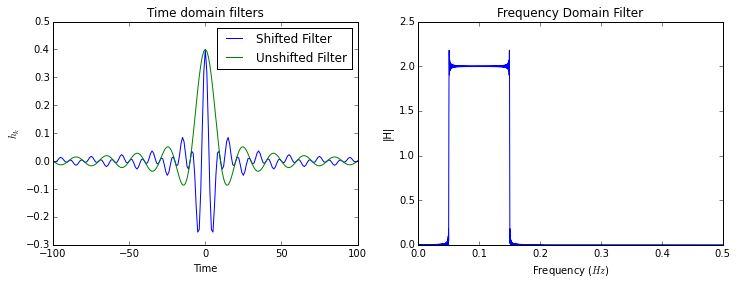

In [280]:
fig, ax=plt.subplots(1,2, figsize = (12,4))
m = 0.1*N
h_shift = 2*h*np.cos(2*np.pi*m*k/N)    
ax[0].plot(k,h_shift, label = 'Shifted Filter')
ax[0].plot(k,2*h, label = 'Unshifted Filter')
ax[0].set_xlim([-100,100])
ax[0].set_xlabel('Time')
ax[0].set_ylabel(r'$h_k$')
ax[0].legend(loc=0)
ax[0].set_title('Time domain filters')
hfft = np.fft.fftshift(np.fft.fft(h_shift))
fh = np.linspace(-0.5,0.5,len(hfft))
ax[1].plot(fh,abs(hfft))
ax[1].set_xlim([0,0.5])
ax[1].set_ylabel(r'|H|')
ax[1].set_xlabel(r'Frequency ($Hz$)')
ax[1].set_title('Frequency Domain Filter')

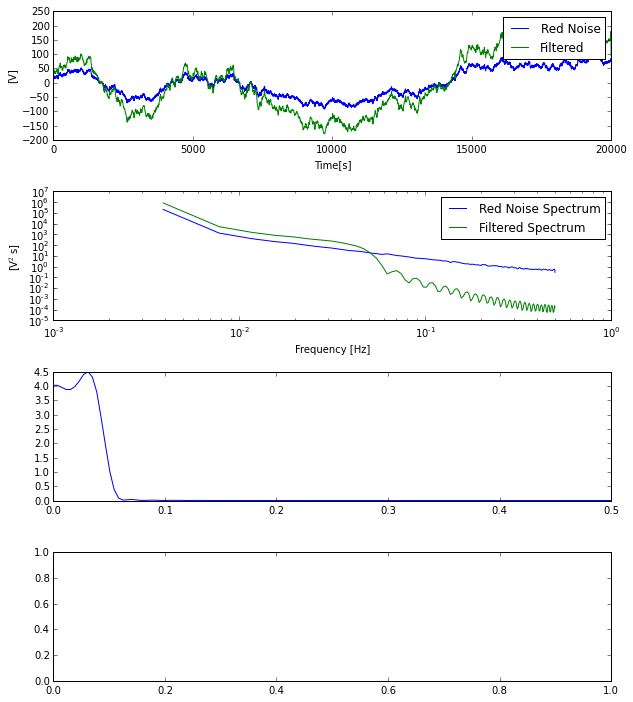

In [279]:
filtlen=25
hs2 = h[abs(k)<filtlen+1]

y = np.convolve(x,hs2,mode='same')

Gxx,f = mlab.psd(x,Fs=1.,NFFT=256,noverlap=128)
Gyy,f = mlab.psd(y,Fs=1.,NFFT=256,noverlap=128)

fig, ax = plt.subplots(4,1, figsize = (10,12))
ax[0].plot(x,label='Red Noise')
ax[0].plot(y,label='Filtered')
ax[0].set_xlabel('Time[s]')
ax[0].set_ylabel('[V]')
ax[0].legend()

ax[1].loglog(f,Gxx,label='Red Noise Spectrum')
ax[1].loglog(f,Gyy,label='Filtered Spectrum')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('[V$^2$s]')
ax[1].legend()

ax[2].plot(f,abs(Gyy/Gxx))


plt.subplots_adjust(hspace = 0.4)